In [31]:
from urllib import request
import pandas as pd
module_urls = ["https://media.githubusercontent.com/media/Ai-Adventures/Test_Datasets/main/strikes_from_2020.csv","https://media.githubusercontent.com/media/Ai-Adventures/Test_Datasets/main/strikes_until_2020.csv"]
for url in module_urls:
  print(f'Fetching {url}')
  module_name = url.split('/')[-1]
  #with open("file_1.txt") as f1, open("file_2.txt") as f2
  with request.urlopen(url) as f, open(module_name,'w') as outf:
    a = f.read()
    outf.write(a.decode('utf-8'))


df1 = pd.read_csv('strikes_from_2020.csv')
df1 = pd.read_csv('strikes_until_2020.csv')
# this fills empty cells with empty strings

Fetching https://media.githubusercontent.com/media/Ai-Adventures/Test_Datasets/main/strikes_from_2020.csv
Fetching https://media.githubusercontent.com/media/Ai-Adventures/Test_Datasets/main/strikes_until_2020.csv


/tmp/ipython-input-1171864587.py:14: DtypeWarning: Columns (18,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('strikes_until_2020.csv')


In [32]:
strikes_until_2020=pd.read_csv('strikes_until_2020.csv')
strikes_from_2020=pd.read_csv('strikes_from_2020.csv')

/tmp/ipython-input-1269530116.py:1: DtypeWarning: Columns (18,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  strikes_until_2020=pd.read_csv('strikes_until_2020.csv')


In [33]:
strikes_until_2020.shape

(232408, 102)

In [34]:
strikes_from_2020.shape

(31472, 102)

In [35]:
strikes_until_2020.columns

Index(['Unnamed: 0', 'INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH',
       'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT',
       'LATITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=102)

In [36]:
strikes_from_2020.columns

Index(['Unnamed: 0', 'INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH',
       'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT',
       'LATITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=102)

In [37]:
all_strikes=pd.concat([strikes_until_2020,strikes_from_2020],axis=0)
all_strikes.head(3)


,Unnamed: 0,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,0,608247,06/05/1991 0:00,5,1991,NaN,Day,KSAT,SAN ANTONIO INTL,29.53369,...,NaN,NaN,NaN,SOURCE = FAA FROM 3830 /Legacy Record=100006/,REDACTED,REDACTED,Other,Pilot,21/11/1997 0:00,0
1,1,608248,05/11/1993 0:00,11,1993,NaN,Dawn,KMCI,KANSAS CITY INTL,39.29761,...,NaN,NaN,NaN,"THIS MAY BE DUPL STRIKE FOR AIR MIDWEST, BUT T...",REDACTED,REDACTED,FAA Form 5200-7,NaN,13/05/1998 0:00,0
2,2,608249,02/07/1995 0:00,7,1995,NaN,NaN,KMCI,KANSAS CITY INTL,39.29761,...,NaN,NaN,NaN,/Legacy Record=100008/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,20/12/2007 0:00,0


In [38]:
all_strikes.columns

Index(['Unnamed: 0', 'INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH',
       'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT',
       'LATITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=102)

In [39]:
r=all_strikes.isnull().sum()
r


,0
Unnamed: 0,0
INDEX_NR,0
INCIDENT_DATE,0
INCIDENT_MONTH,0
INCIDENT_YEAR,0
...,...
REPORTED_TITLE,0
SOURCE,0
PERSON,21162
LUPDATE,0


In [40]:
remov=r<=600000
remov

,0
Unnamed: 0,True
INDEX_NR,True
INCIDENT_DATE,True
INCIDENT_MONTH,True
INCIDENT_YEAR,True
...,...
REPORTED_TITLE,True
SOURCE,True
PERSON,True
LUPDATE,True


In [41]:
all_strikes=all_strikes.loc[:,remov]
all_strikes.shape

(263880, 102)

In [42]:
all_strikes.columns

Index(['Unnamed: 0', 'INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH',
       'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT',
       'LATITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=102)

In [43]:
cols_to_remove = []
for col in all_strikes.columns:
    if all_strikes[col].nunique() == 1:
        cols_to_remove.append(col)
all_strikes = all_strikes.drop(columns=cols_to_remove)
print(cols_to_remove)

['STR_STR', 'REPORTED_NAME', 'REPORTED_TITLE', 'TRANSFER']


In [44]:
print(all_strikes['INCIDENT_DATE'].astype(str).head(10))

0    06/05/1991 0:00
1    05/11/1993 0:00
2    02/07/1995 0:00
3    19/09/1990 0:00
4    03/05/1992 0:00
5    07/08/1990 0:00
6    07/09/1990 0:00
7    14/04/1995 0:00
8    08/12/1993 0:00
9    01/09/1994 0:00
Name: INCIDENT_DATE, dtype: object


In [45]:
all_strikes['NUM_STRUCK'].unique()
all_strikes['NUM_STRUCK'].dropna().unique()

array(['1', '11-100', '02-Oct', 'More than 100'], dtype=object)

In [46]:
all_strikes['NUM_STRUCK']=all_strikes['NUM_STRUCK'].replace('02-Oct','2-10')
all_strikes['NUM_STRUCK'].dropna().unique()

array(['1', '11-100', '2-10', 'More than 100'], dtype=object)

In [47]:
struck_col =[c for c in all_strikes.columns if c.startswith("STR_")]
print(struck_col)

['STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'STR_OTHER']


In [48]:
all_strikes['total_struck']=all_strikes[struck_col].sum(axis=1)
print(all_strikes["total_struck"].mean())

0.8371987266939518


In [49]:
damage_col=[d for d in all_strikes.columns if d.startswith("DAM")]
print(damage_col)

['DAMAGE_LEVEL', 'DAM_RAD', 'DAM_WINDSHLD', 'DAM_NOSE', 'DAM_ENG1', 'DAM_ENG2', 'DAM_ENG3', 'DAM_ENG4', 'DAM_PROP', 'DAM_WING_ROT', 'DAM_FUSE', 'DAM_LG', 'DAM_TAIL', 'DAM_LGHTS', 'DAM_OTHER']


In [50]:
len(damage_col)

15

In [51]:
d_str = []
d_int = []

for d in damage_col:
    if all_strikes[d].dtype == 'object':
        d_str.append(d)
    elif all_strikes[d].dtype=='int64':
        d_int.append(d)

print(d_str)
print(d_int)


['DAMAGE_LEVEL']
['DAM_RAD', 'DAM_WINDSHLD', 'DAM_NOSE', 'DAM_ENG1', 'DAM_ENG2', 'DAM_ENG3', 'DAM_ENG4', 'DAM_PROP', 'DAM_WING_ROT', 'DAM_FUSE', 'DAM_LG', 'DAM_TAIL', 'DAM_LGHTS', 'DAM_OTHER']


In [52]:
all_strikes=all_strikes.dropna(subset=['DAMAGE_LEVEL'])

In [53]:
all_strikes['DAMAGE_LEVEL']=all_strikes['DAMAGE_LEVEL'].replace({'N': 0,'M': 1,'M?': 2,'S': 3,'D': 4})

/tmp/ipython-input-3583189135.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_strikes['DAMAGE_LEVEL']=all_strikes['DAMAGE_LEVEL'].replace({'N': 0,'M': 1,'M?': 2,'S': 3,'D': 4})


In [54]:
all_strikes['DAMAGE_LEVEL'].unique()


array([0, 2, 1, 3, 4])

In [55]:
all_strikes['DAMAGE_LEVEL']=all_strikes['DAMAGE_LEVEL'].astype(int)


In [56]:
all_strikes['total_damaged']=all_strikes[damage_col].sum(axis=1)
print(all_strikes["total_damaged"].mean())

0.3227900131647782


In [57]:
a=[a for a in all_strikes.columns if a.startswith("A")]
a

['AIRPORT_ID',
 'AIRPORT',
 'AIRCRAFT',
 'AMA',
 'AMO',
 'AC_CLASS',
 'AC_MASS',
 'AOS']

In [58]:
all_strikes['AIRCRAFT'].head(5)

,AIRCRAFT
0,B-727-100
1,BE-1900
2,B-737-500
4,MERLIN IV
5,C-152


In [59]:
all_strikes['INCIDENT_DATE'] = pd.to_datetime(all_strikes['INCIDENT_DATE'], format="%d/%m/%Y %H:%M")

In [60]:
i=(all_strikes['AIRCRAFT']=='A-320') & (all_strikes['INCIDENT_DATE']>='1.1.2022')

In [61]:
df1=all_strikes.loc[i,:]
df1

,Unnamed: 0,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,...,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,SOURCE,PERSON,LUPDATE,total_struck,total_damaged
10858,244483,1171521,2022-01-06,1,2022,17:07,Day,KRSW,SOUTHWEST FLORIDA INTL ARPT,26.53617,...,Small,NaN,NaN,NaN,SI ID,FAA Form 5200-7-E,Airport Operations,20/01/2022 0:00,1,0
11037,244679,1181990,2022-01-21,1,2022,9:21,NaN,ZZZZ,UNKNOWN,NaN,...,Small,NaN,NaN,NaN,SI ID,FAA Form 5200-7-E,Airport Operations,25/01/2022 0:00,1,0
11136,244784,1183140,2022-01-07,1,2022,0:36,NaN,ZZZZ,UNKNOWN,NaN,...,Small,NaN,NaN,NaN,SI ID,FAA Form 5200-7-E,Airport Operations,31/01/2022 0:00,1,0
11179,244827,1183216,2022-01-22,1,2022,21:35,NaN,ZZZZ,UNKNOWN,NaN,...,Small,NaN,NaN,NaN,SI ID,FAA Form 5200-7-E,Airport Operations,31/01/2022 0:00,2,0
11272,244921,1183513,2022-01-07,1,2022,12:00,NaN,ZZZZ,UNKNOWN,NaN,...,Small,NaN,NaN,NaN,SI ID,FAA Form 5200-7-E,Airport Operations,04/02/2022 0:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31415,275446,1369303,2022-07-28,7,2022,6:57,NaN,KSMF,SACRAMENTO INTL,38.69542,...,NaN,NaN,NaN,NaN,NaN,MOR,Tower,02/02/2023 0:00,1,0
31431,275462,1369339,2022-07-31,7,2022,16:43,Day,KMCO,ORLANDO INTL,28.42889,...,NaN,NaN,NaN,NaN,NaN,MOR,Tower,02/02/2023 0:00,1,0
31459,275490,1369379,2022-11-22,11,2022,21:20,NaN,ZZZZ,UNKNOWN,NaN,...,Small,NaN,NaN,NaN,NaN,FAA Form 5200-7-E,Airport Operations,03/02/2023 0:00,1,0
31460,275491,1369380,2022-11-22,11,2022,NaN,Day,KJFK,JOHN F KENNEDY INTL,40.63975,...,Medium,NaN,NaN,NaN,NaN,FAA Form 5200-7-E,Airport Operations,03/02/2023 0:00,1,0


In [62]:
df1['AIRCRAFT']
df1['INCIDENT_DATE']

,INCIDENT_DATE
10858,2022-01-06
11037,2022-01-21
11136,2022-01-07
11179,2022-01-22
11272,2022-01-07
...,...
31415,2022-07-28
31431,2022-07-31
31459,2022-11-22
31460,2022-11-22


In [63]:
df2=all_strikes.loc[all_strikes['total_damaged']>=5,:]
df2

,Unnamed: 0,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,...,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,SOURCE,PERSON,LUPDATE,total_struck,total_damaged
13,13,608261,1995-04-28,4,1995,NaN,NaN,KSFO,SAN FRANCISCO INTL ARPT,37.61900,...,Medium,NaN,NaN,NaN,SOURCE = BOEING & AIRLINE (7-13-09 UPDATED BY ...,Multiple,Air Transport Operations,13/07/2009 0:00,3,6
19,19,608268,1991-10-18,10,1991,NaN,Day,KDEN*,DENVER STAPLETON ARPT,39.85840,...,Large,NaN,NaN,NaN,/Legacy Record=100027/,AC Incident Rept,Tower,19/05/2005 0:00,3,6
91,91,608350,1991-05-10,5,1991,NaN,Night,KONT,ONTARIO INTL ARPT,34.05600,...,Large,NaN,NaN,NaN,/Legacy Record=100109/,FAA Form 5200-7,NaN,19/03/2001 0:00,4,6
126,126,608569,1992-11-12,11,1992,NaN,NaN,KLOM,WINGS FIELD ARPT,40.13647,...,Large,NaN,NaN,NaN,OPERATOR = JOHN C GODFREY /Legacy Record=100329/,FAA Form 5200-7,NaN,05/08/2004 0:00,2,5
391,391,608576,1990-08-21,8,1990,NaN,Day,KPIT,PITTSBURGH INTL ARPT,40.49147,...,Small,NaN,NaN,NaN,ENG MANU #129837 SOURCE = 5200-7 & ENG MANU ...,Multiple,Other,29/03/1999 0:00,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29072,272462,1352505,2022-12-18,12,2022,14:05,Day,KMDW,CHICAGO MIDWAY INTL ARPT,41.78598,...,Large,NaN,NaN,NaN,"emailed reporter for photo release, AOS and re...",FAA Form 5200-7-E,Airport Operations,04/01/2023 0:00,2,5
29483,272902,1354030,2022-09-26,9,2022,13:15,Day,KMSP,MINNEAPOLIS-ST PAUL INTL/WOLD-CHAMBERLAIN ARPT,44.88055,...,Large,NaN,NaN,NaN,*** Strike Report: 2022-09-26-153629-R3( Repor...,Multiple,Airport Operations,12/01/2023 0:00,5,5
30011,273827,1365428,2022-10-31,10,2022,17:09,Day,ZZZZ,UNKNOWN,NaN,...,Large,FL,NaN,NaN,NaN,FAA Form 5200-7-E,Pilot,20/01/2023 0:00,2,5
30584,274466,1367286,2022-11-15,11,2022,21:15,Night,KMCI,KANSAS CITY INTL,39.29761,...,Large,NaN,NaN,NaN,*** Strike Report: 2022-11-15-225001-R5( Repor...,Multiple,Airport Operations,25/01/2023 0:00,3,5


In [64]:
common_airport = all_strikes[all_strikes['AIRPORT']!='UNKNOWN']
tp10_air= common_airport['AIRPORT'].value_counts().head(10)
print(tp10_air)


AIRPORT
DENVER INTL AIRPORT            3869
DALLAS/FORT WORTH INTL ARPT    3565
MEMPHIS INTL                   3535
CHICAGO O'HARE INTL ARPT       3040
SACRAMENTO INTL                3002
MUHAMMAD ALI INTERNATIONAL     2327
CHARLOTTE/DOUGLAS INTL ARPT    2322
PHILADELPHIA INTL              2277
JOHN F KENNEDY INTL            2251
LA GUARDIA ARPT                2125
Name: count, dtype: int64


In [65]:
df3=all_strikes['AIRPORT'].value_counts().head(10)
df3

,count
AIRPORT,
UNKNOWN,30442
DENVER INTL AIRPORT,3869
DALLAS/FORT WORTH INTL ARPT,3565
MEMPHIS INTL,3535
CHICAGO O'HARE INTL ARPT,3040
SACRAMENTO INTL,3002
MUHAMMAD ALI INTERNATIONAL,2327
CHARLOTTE/DOUGLAS INTL ARPT,2322
PHILADELPHIA INTL,2277


In [66]:
t=all_strikes['AIRPORT'].value_counts().head(10).sum()
t

np.int64(56630)

In [67]:
s=all_strikes['AIRPORT'].value_counts().sum()
s

np.int64(173949)

In [68]:
f=t/s
print(f*100)

32.55551914641648


In [69]:
table=all_strikes.groupby('TIME_OF_DAY')[['total_struck','total_damaged']].mean().reset_index()
table


,TIME_OF_DAY,total_struck,total_damaged
0,Dawn,1.252245,0.333690
1,Day,1.181107,0.319759
2,Dusk,1.316114,0.423327
3,Night,1.198872,0.349707


In [70]:
all_strikes['WARNED'].head()

,WARNED
0,No
1,Yes
2,Unknown
4,Yes
5,No


In [71]:
knwn_warn=all_strikes[all_strikes['WARNED']!='Unknown']
knwn_warn['WARNED']
table=knwn_warn.groupby('WARNED')['total_struck'].sum().reset_index()
table

,WARNED,total_struck
0,No,68875
1,Yes,50789


In [72]:
all_strikes['PERSON'].value_counts().head(1).idxmax()

'Airport Operations'

In [73]:
table=all_strikes.groupby('PERSON')[['total_damaged','total_struck']].sum().reset_index()
table

,PERSON,total_damaged,total_struck
0,Air Transport Operations,9146,35281
1,Airport Operations,11071,57251
2,Carcass Found,0,2
3,Other,4819,6342
4,Pilot,17496,60082
5,Tower,6178,23077


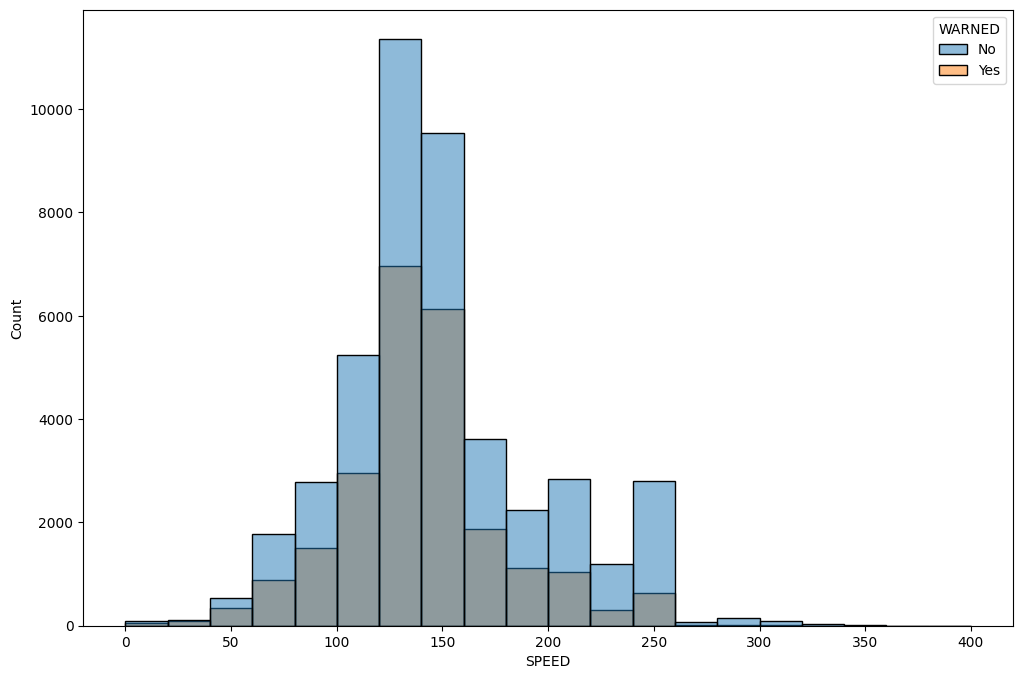

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
data1= all_strikes[(all_strikes['SPEED'] <= 1000) & (all_strikes['WARNED']!='Unknown')]
sns.histplot(data=data1,x='SPEED',hue='WARNED',bins=20)
plt.show()

<Axes: xlabel='INCIDENT_YEAR', ylabel='total_damaged'>

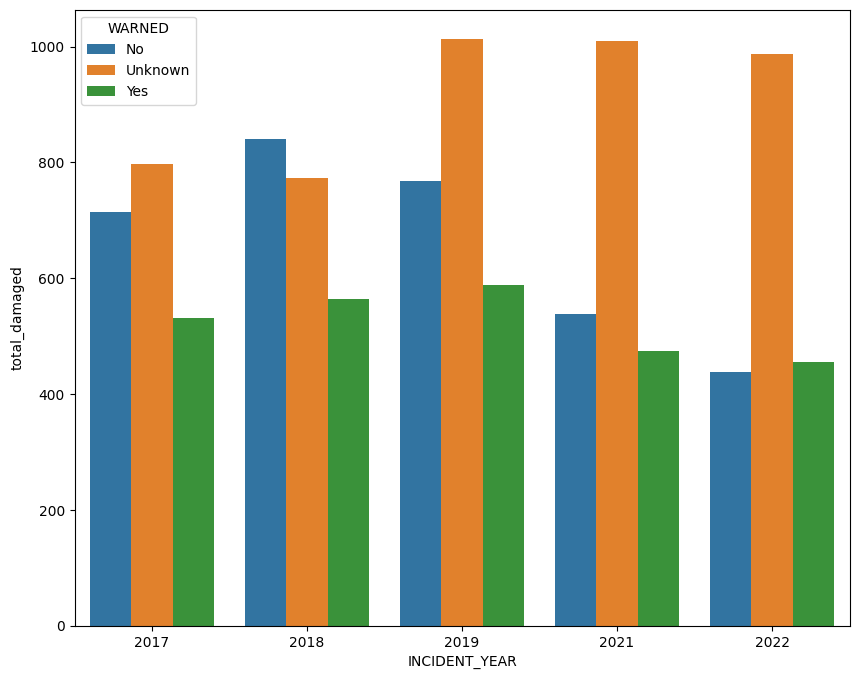

In [75]:
vo=all_strikes[all_strikes['INCIDENT_YEAR'].between(2017,2022)]
data2=vo.groupby(['INCIDENT_YEAR', 'WARNED'])['total_damaged'].sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=data2,x='INCIDENT_YEAR',y='total_damaged',hue='WARNED')

<Axes: xlabel='PHASE_OF_FLIGHT', ylabel='total_struck'>

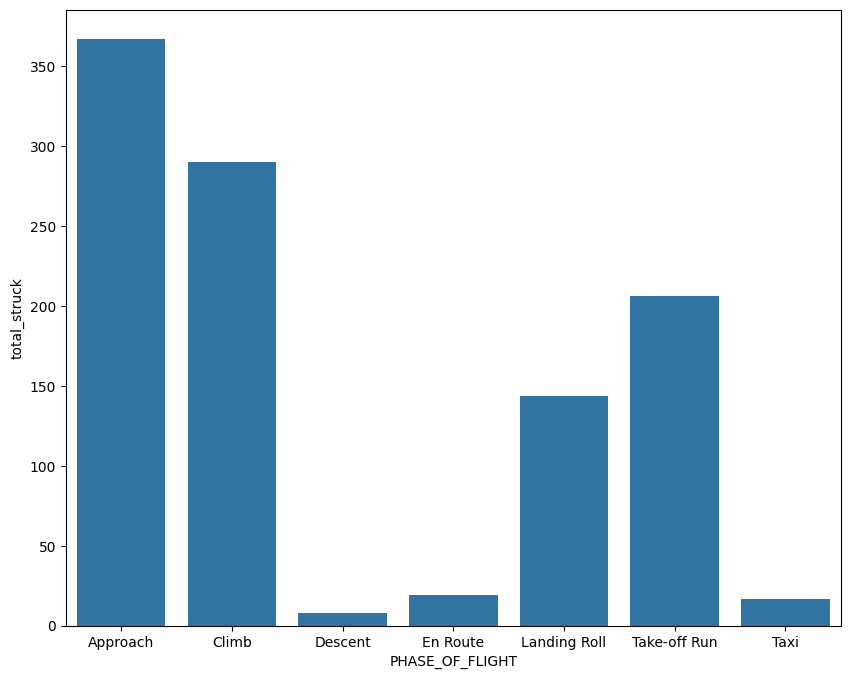

In [76]:
foo=all_strikes[all_strikes['total_struck']>=8]
foo.head()
cll=foo.groupby('PHASE_OF_FLIGHT')['total_struck'].sum().reset_index()
cll
plt.figure(figsize=(10,8))
sns.barplot(data=cll,x='PHASE_OF_FLIGHT',y='total_struck')

<Axes: >

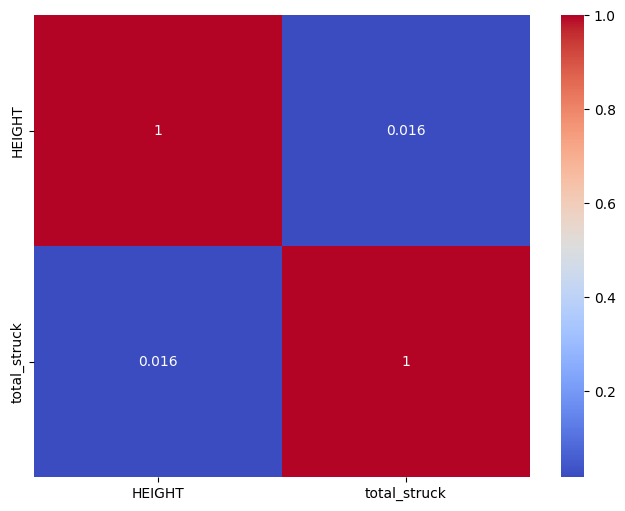

In [77]:
df=all_strikes[['HEIGHT','total_struck']]
df=df.dropna()
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


In [78]:
boo=all_strikes[all_strikes['SPEED']<=500]
med=boo.groupby('TIME_OF_DAY')['SPEED'].median().reset_index()
med




,TIME_OF_DAY,SPEED
0,Dawn,135.0
1,Day,130.0
2,Dusk,130.0
3,Night,150.0


<Axes: xlabel='TIME_OF_DAY', ylabel='SPEED'>

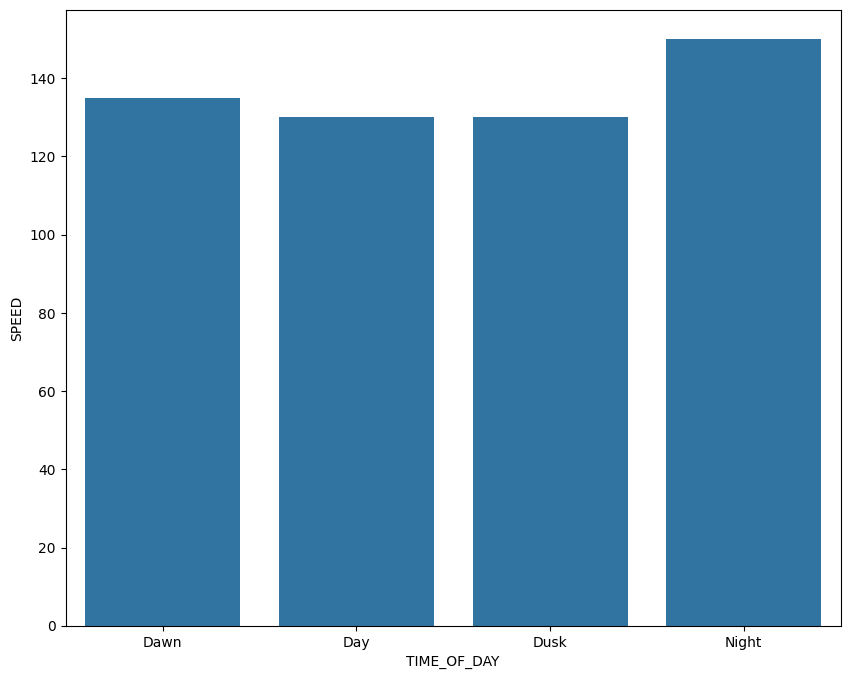

In [79]:
plt.figure(figsize=(10,8))
sns.barplot(data=med,x='TIME_OF_DAY',y='SPEED')

In [80]:
all_strikes['total_struck']

,total_struck
0,1
1,5
2,2
4,1
5,1
...,...
31463,1
31464,3
31465,1
31467,2


In [81]:
all_strikes['WARNED']

,WARNED
0,No
1,Yes
2,Unknown
4,Yes
5,No
...,...
31463,Unknown
31464,No
31465,Unknown
31467,Yes


In [82]:
all_strikes = all_strikes[all_strikes['WARNED'] != 'Unknown'].reset_index(drop=True)


In [83]:
all_strikes['WARNED']

,WARNED
0,No
1,Yes
2,Yes
3,No
4,No
...,...
97791,Yes
97792,No
97793,Yes
97794,No


In [84]:
import numpy as np
from scipy import stats
all_strikes=all_strikes.dropna(subset=['total_struck', 'WARNED'])
warning=all_strikes[all_strikes['WARNED'] == 'Yes']['total_struck']
nowarning=all_strikes[all_strikes['WARNED'] == 'No']['total_struck']
t_statistic,p_value=stats.ttest_ind(warning, nowarning)
print(f"T-statistic:{t_statistic}")
print(f"p-value:{p_value}")

T-statistic:-3.441119049044886
p-value:0.0005795554816832285


In [89]:
totaldamage = all_strikes.groupby('INCIDENT_YEAR')[['total_struck','total_damaged']].sum()
totaldamage

,total_struck,total_damaged
INCIDENT_YEAR,,
1990,876,656
1991,1297,775
1992,1651,780
1993,1599,791
1994,1764,865
1995,1956,912
1996,1837,874
1997,2377,1030
1998,2525,1057


In [90]:
f_statistic, p_value = stats.f_oneway(all_strikes['INCIDENT_YEAR'],all_strikes['total_struck']-all_strikes['total_damaged'])
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

F-statistic: 5199306694.841931
p-value: 0.0
